In [1]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!pip install -q keras

In [3]:
import keras

In [4]:
!cp -r /content/drive/MyDrive/TA/Data/Bahan /content

In [5]:
from sklearn import datasets

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
!pip install split-folders
import splitfolders # or import splitfolders
input_folder = "/content/Bahan"
output = "/content/Result" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 896 files [00:00, 2146.69 files/s]


In [8]:
import os

# /content/Bahan

Pre processing

In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
"""train_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 30,
                  horizontal_flip = True,
                  shear_range = 0.3,
                  fill_mode = 'nearest',
                  width_shift_range = 0.2,
                  height_shift_range = 0.2,
                  zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 30,
                  horizontal_flip = True,
                  shear_range = 0.3,
                  fill_mode = 'nearest',
                  width_shift_range = 0.2,
                  height_shift_range = 0.2,
                  zoom_range = 0.1
)"""

train_datagen = ImageDataGenerator(
                  rescale = 1./255
)

In [11]:
base_dir = '/content/Result'
!ls "/content/Result"

test  train  val


In [12]:
import os

test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

Target

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

val_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    batch_size = 32, 
    class_mode = 'categorical'
)

Found 716 images belonging to 3 classes.
Found 89 images belonging to 3 classes.


In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('val_accuracy') > 0.95):
      print('\nAkurasi mencapai 95%')
      self.model.stop_training = True

callbacks = myCallback()

Model CNN

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import math
import shutil
import glob
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D

In [16]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(250, activation = 'relu'),
          tf.keras.layers.Dropout(0.3),
          tf.keras.layers.Dense(3, activation = 'softmax')
])

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [19]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics = ['accuracy'])

In [20]:
history = model.fit(
            train_generator,
            epochs = 40,
            validation_data = val_generator,
            callbacks = [callbacks]
)

Epoch 1/40
23/23 [==============================] - 24s 639ms/step - loss: 1.0792 - accuracy: 0.3980 - val_loss: 1.0750 - val_accuracy: 0.3371
Epoch 2/40
23/23 [==============================] - 13s 571ms/step - loss: 1.0261 - accuracy: 0.4637 - val_loss: 1.0169 - val_accuracy: 0.4382
Epoch 3/40
23/23 [==============================] - 13s 546ms/step - loss: 0.9632 - accuracy: 0.6187 - val_loss: 0.9451 - val_accuracy: 0.7528
Epoch 4/40
23/23 [==============================] - 13s 560ms/step - loss: 0.8957 - accuracy: 0.6508 - val_loss: 0.8807 - val_accuracy: 0.7191
Epoch 5/40
23/23 [==============================] - 13s 545ms/step - loss: 0.8080 - accuracy: 0.7123 - val_loss: 0.7877 - val_accuracy: 0.7528
Epoch 6/40
23/23 [==============================] - 13s 569ms/step - loss: 0.7486 - accuracy: 0.7263 - val_loss: 0.7245 - val_accuracy: 0.7416
Epoch 7/40
23/23 [==============================] - 13s 555ms/step - loss: 0.7115 - accuracy: 0.7332 - val_loss: 0.6904 - val_accuracy: 0.6966

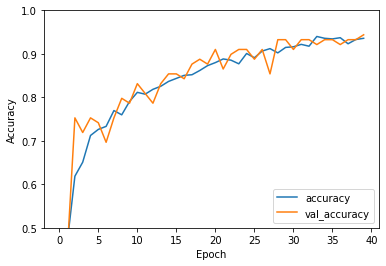

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Tingkat Akurasi dan Loss Model

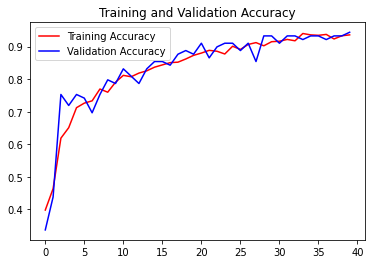

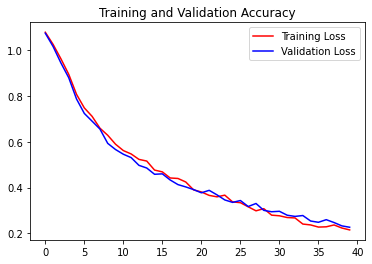

In [22]:
%matplotlib inline

import matplotlib.image as mping
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

Klasifikasi

Saving new.jpeg to new.jpeg
[[1. 0. 0.]]


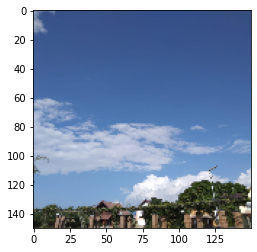

In [23]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras import Model
from keras.models import Model

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150, 150))
  implot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)
  print(classes)
  """

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

  """

In [24]:
model.save("filecnn.h5")